In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files # import the file into googlecolab
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [ ]:
sales_data = pd.read_excel('Online Retail.xlsx')
sales_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
sales_data["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

To show basic descriptive statistics

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
sales_data.shape

(541909, 8)

In [ ]:
sales_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


To rename some of the columns for easy readaility

In [ ]:
sales_data = sales_data.rename(columns={"InvoiceDate": " DateTime", "UnitPrice": "Price", "CustomerID": "Customer ID","Description":"Product" })
sales_data.head(5)

,InvoiceNo,StockCode,Product,Quantity,DateTime,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Converting Date column to datetime data type and seperating the column into Date and Time respectively

In [ ]:
sales_data["DateTime"] = pd.to_datetime(sales_data[' DateTime'])
sales_data['Date'] = sales_data["DateTime"].dt.date
sales_data['Time'] = sales_data["DateTime"].dt.time
sales_data.head(3)

,InvoiceNo,StockCode,Product,Quantity,DateTime,Price,Customer ID,Country,DateTime,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00


Dropping irrelevant columm

In [ ]:
sales_data = sales_data.drop(['InvoiceNo','DateTime','StockCode'], axis=1)
sales_data.head(5)

,Product,Quantity,DateTime,Price,Customer ID,Country,Date,Time
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


To remove duplicated rows

In [ ]:
duplicate_rows_sales_data = sales_data[sales_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_sales_data.shape)

number of duplicate rows:  (6007, 8)


In [ ]:
sales_data.count()

Product        540455
Quantity       541909
 DateTime      541909
Price          541909
Customer ID    406829
Country        541909
Date           541909
Time           541909
dtype: int64

There are 540455 rows and we have to remove 6007 duplicated rows

In [ ]:
sales_data = sales_data.drop_duplicates()
sales_data.head(5)

,Product,Quantity,DateTime,Price,Customer ID,Country,Date,Time
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [ ]:
sales_data.count()

Product        534532
Quantity       535902
 DateTime      535902
Price          535902
Customer ID    401528
Country        535902
Date           535902
Time           535902
dtype: int64

Droppig misssing or null values

In [ ]:
print(sales_data.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Product  Quantity   DateTime  Price  Customer ID  Country   Date  \
0         False     False      False  False        False    False  False   
1         False     False      False  False        False    False  False   
2         False     False      False  False        False    False  False   
3         False     False      False  False        False    False  False   
4         False     False      False  False        False    False  False   
...         ...       ...        ...    ...          ...      ...    ...   
541904    False     False      False  False        False    False  False   
541905    False     False      False  False        False    False  False   
541906    False     False      False  False        False    False  False   
541907    False     False      False  False        False    False  False   
541908    False     False      False  False        False    False  False   

         Time  
0       F

In [ ]:
sales_data = sales_data.dropna()
sales_data.count()

Product        401528
Quantity       401528
 DateTime      401528
Price          401528
Customer ID    401528
Country        401528
Date           401528
Time           401528
dtype: int64

As all the rows which contain the Null or N/A values were removed, customer id rows alligns with the rest attributes.

Text(0.5, 0, 'Description')

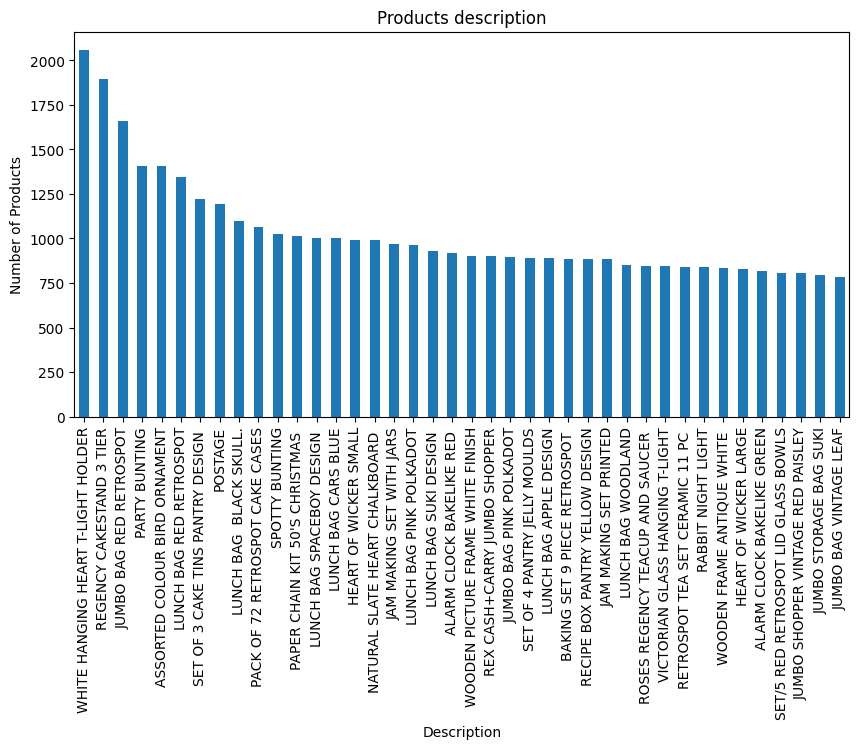

In [ ]:
sales_data.Product.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Products description")
plt.ylabel('Number of Products')
plt.xlabel('Description')

In [ ]:
sales_data["Total_sales"] = sales_data['Quantity'] * sales_data['Price']

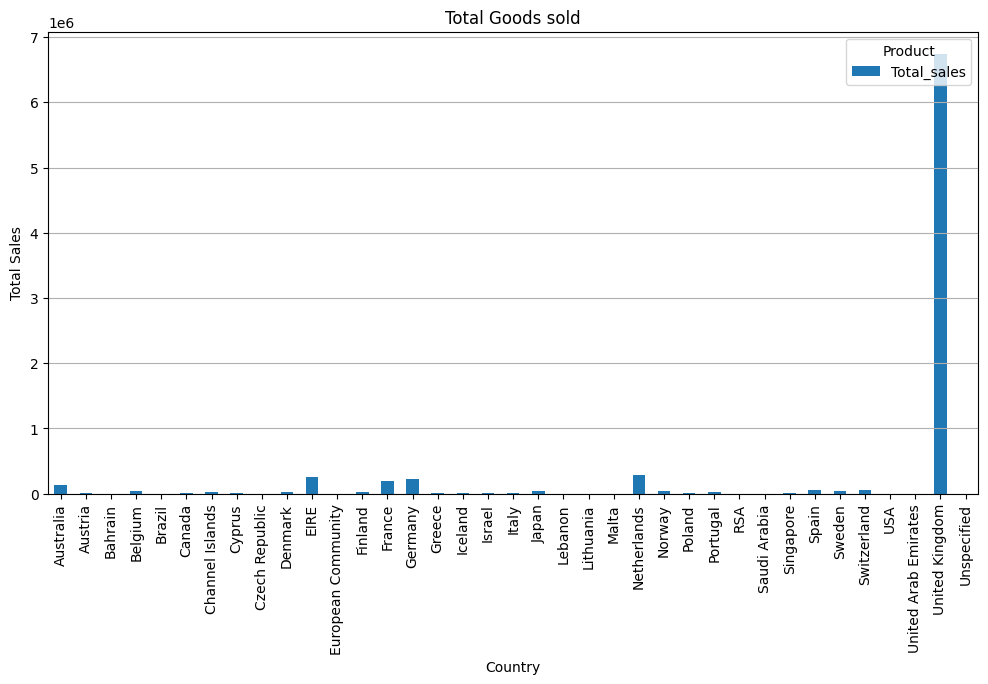

In [ ]:
country_sales = sales_data.groupby('Country') ['Total_sales'].sum()
country_sales.plot(kind='bar',stacked = True, figsize =(12, 6))
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Goods sold')
plt.legend(title = 'Product',loc='upper right')
plt.grid(axis='y')
plt.show()
# most of the goods were sold in the United Kigdom which also appears to be an outlier for the sales

to visualise average coutry sales

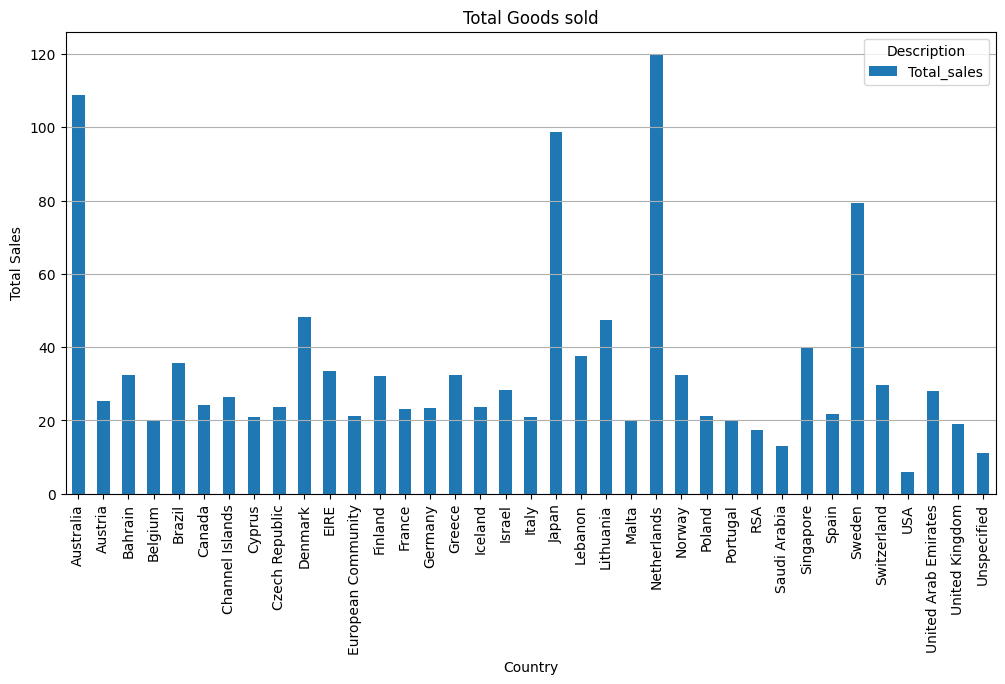

In [ ]:
avg_country_sales = sales_data.groupby('Country') ['Total_sales'].mean()
avg_country_sales.plot(kind='bar',stacked = True, figsize =(12, 6))
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Goods sold')
plt.legend(title = 'Description',loc='upper right')
plt.grid(axis='y')
plt.show()


the highest sales day in each country

In [ ]:
highest_sales_day_by_country = sales_data.groupby(['Country','Date']) ['Total_sales'].max()
highest_sales_day_by_country



Country      Date      
Australia    2010-12-01      51.00
             2010-12-08      71.40
             2010-12-14      -6.25
             2010-12-17     147.50
             2011-01-06    1020.00
                            ...   
Unspecified  2011-05-10      45.00
             2011-06-20      25.00
             2011-07-14      29.90
             2011-07-28      22.50
             2011-08-22      69.36
Name: Total_sales, Length: 1682, dtype: float64

to get the descriptive stats for the quantity sold in each country

In [ ]:
sales_data.groupby(["Country"]).agg({'Quantity' :['mean', 'median','std', 'min', 'max']})

Quantity                                 
                           mean median         std    min    max
Country                                                         
Australia             66.488871   24.0   97.712803   -120   1152
Austria               12.037406    9.0   21.745485    -48    288
Bahrain               15.294118    6.0   24.959379      2     96
Belgium               11.189947   10.0   13.601441    -12    272
Brazil                11.125000   10.0    8.476723      2     24
Canada                18.298013   12.0   46.682587      1    504
Channel Islands       12.513871   10.0   22.584559     -2    407
Cyprus                10.288525    5.0   23.460732    -33    288
Czech Republic        19.733333   24.0   22.813990    -24     72
Denmark               21.048843   12.0   27.402502    -25    256
EIRE                  18.218997   10.0   42.040305   -288   1440
European Community     8.147541    6.0    6.546847     -2     24
Finland               15.346763   10.0   21.001421    -27    144
France                12.956460   10.0   21.473831   -250    912
Germany               12.378943   10.0   17.876587   -288    600
Greece                10.657534   10.0    7.724067     -1     48
Iceland               13.505495   12.0   18.856172      2    240
Israel                16.174797   12.0   16.776013    -32    100
Italy                  9.961395    6.0   13.579809    -12    200
Japan                 70.441341   36.0  177.191079   -624   2040
Lebanon                8.577778    8.0    4.314294      2     24
Lithuania             18.628571   16.0   10.137542      6     48
Malta                  7.433071    6.0    8.069726     -4     48
Netherlands           84.406580   72.0  111.369151   -480   2400
Norway                17.722836   12.0   22.644876    -12    240
Poland                10.712610   10.0   10.174628     -6     72
Portugal              10.888511   10.0   11.931942    -12    120
RSA                    6.068966    6.0    3.329096      1     12
Saudi Arabia           7.500000    9.0    5.720334     -5     12
Singapore             22.855895   12.0   27.742886     -1    288
Spain                 10.607991    6.0   24.150780   -288    360
Sweden                77.292842   20.0  128.987626   -240    768
Switzerland           15.864678   12.0   19.293265   -120    288
USA                    3.553265    5.0   16.450545    -36     72
United Arab Emirates  14.441176   12.0   12.474909      1     72
United Kingdom        11.198929    4.0  265.024893 -80995  80995
Unspecified            7.406639    2.0    8.925653      1     36

Handlig outliers in the data

<Axes: xlabel='Total_sales'>

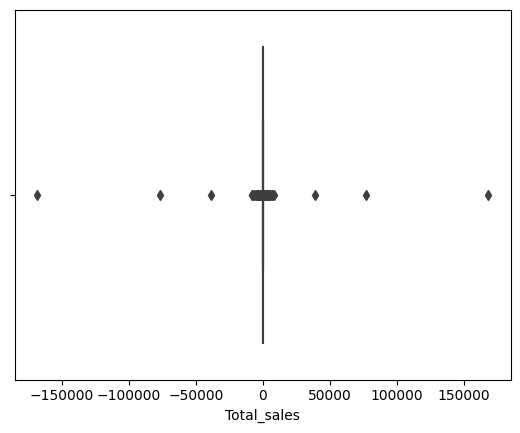

In [ ]:
sns.boxplot(x=sales_data['Total_sales'])

<Axes: xlabel='Price'>

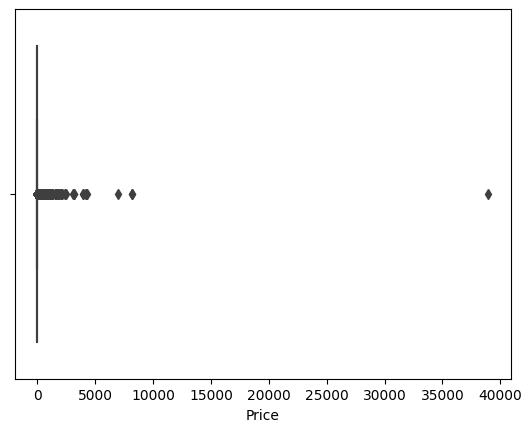

In [ ]:
sns.boxplot(x=sales_data['Price'])

<Axes: xlabel='Quantity'>

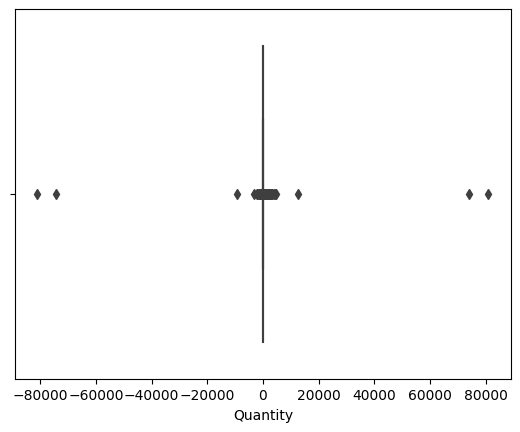

In [ ]:
sns.boxplot(x=sales_data['Quantity'])

In [ ]:
Q1 = sales_data.quantile(0.25)
Q3 = sales_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity         10.00
Price             2.50
Customer ID    2849.00
Total_sales      15.55
dtype: float64


<ipython-input-26-7607d66cd52e>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = sales_data.quantile(0.25)
<ipython-input-26-7607d66cd52e>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = sales_data.quantile(0.75)


To find total sales amount for each country

In [ ]:
total_sales_by_country = sales_data.groupby('Country')['Total_sales'].sum()
total_sales_by_country

Country
Australia                137009.770
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20076.390
Cyprus                    12850.360
Czech Republic              707.720
Denmark                   18768.140
EIRE                     250001.780
European Community         1291.750
Finland                   22326.740
France                   196626.050
Germany                  221491.470
Greece                     4710.520
Iceland                    4310.000
Israel                     6978.400
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal                  28995.760
RSA                 

to see the highest quantity of goods sold for each country according to price in descending order

In [ ]:
sales_data.groupby(["Country","Quantity","Product"]).max().sort_values("Price",ascending= False)

DateTime  \
Country        Quantity Product                                                  
United Kingdom -1       Manual                             2011-12-09 10:28:00   
                1       POSTAGE                            2011-11-23 10:32:00   
               -1       POSTAGE                            2011-12-06 14:23:00   
France         -2       Manual                             2011-10-27 14:15:00   
                1       Manual                             2011-11-04 13:24:00   
...                                                                        ...   
EIRE            10      REGENCY CAKESTAND 3 TIER           2010-12-21 13:45:00   
RSA             1       Manual                             2011-10-13 12:50:00   
United Kingdom  5       MINI CAKE STAND  HANGING STRAWBERY 2011-03-30 12:45:00   
                12540   ASSTD DESIGN 3D PAPER STICKERS     2011-11-25 15:57:00   
Germany         1       ROUND CAKE TIN VINTAGE GREEN       2010-12-05 14:02:00   

                                                               Price  \
Country        Quantity Product                                        
United Kingdom -1       Manual                              38970.00   
                1       POSTAGE                              8142.75   
               -1       POSTAGE                              8142.75   
France         -2       Manual                               4161.06   
                1       Manual                               4161.06   
...                                                              ...   
EIRE            10      REGENCY CAKESTAND 3 TIER                0.00   
RSA             1       Manual                                  0.00   
United Kingdom  5       MINI CAKE STAND  HANGING STRAWBERY      0.00   
                12540   ASSTD DESIGN 3D PAPER STICKERS          0.00   
Germany         1       ROUND CAKE TIN VINTAGE GREEN            0.00   

                                                            Customer ID  \
Country        Quantity Product                                           
United Kingdom -1       Manual                                  18102.0   
                1       POSTAGE                                 17935.0   
               -1       POSTAGE                                 18270.0   
France         -2       Manual                                  12536.0   
                1       Manual                                  12669.0   
...                                                                 ...   
EIRE            10      REGENCY CAKESTAND 3 TIER                14911.0   
RSA             1       Manual                                  12446.0   
United Kingdom  5       MINI CAKE STAND  HANGING STRAWBERY      13113.0   
                12540   ASSTD DESIGN 3D PAPER STICKERS          13256.0   
Germany         1       ROUND CAKE TIN VINTAGE GREEN            12647.0   

                                                                  Date  \
Country        Quantity Product                                          
United Kingdom -1       Manual                              2011-12-09   
                1       POSTAGE                             2011-11-23   
               -1       POSTAGE                             2011-12-06   
France         -2       Manual                              2011-10-27   
                1       Manual                              2011-11-04   
...                                                                ...   
EIRE            10      REGENCY CAKESTAND 3 TIER            2010-12-21   
RSA             1       Manual                              2011-10-13   
United Kingdom  5       MINI CAKE STAND  HANGING STRAWBERY  2011-03-30   
                12540   ASSTD DESIGN 3D PAPER STICKERS      2011-11-25   
Germany         1       ROUND CAKE TIN VINTAGE GREEN        2010-12-05   

                                                                Time  \
Country        Quantity Product                        

to see the highest  goods sold for each country according with dates in descending order

In [ ]:
sales_data.groupby(["Country","Quantity","Product"]).max().sort_values("Date",ascending= False)

DateTime  \
Country        Quantity Product                                                  
United Kingdom  6       WALL ART GARDEN HAVEN              2011-12-09 09:07:00   
Norway          36      CHOCOLATE THIS WAY METAL SIGN      2011-12-09 08:48:00   
                32      SET OF 12 FAIRY CAKE BAKING CASES  2011-12-09 08:48:00   
United Kingdom  8       PICTURE FRAME WOOD TRIPLE PORTRAIT 2011-12-09 08:59:00   
Norway          30      VINTAGE DOILY TRAVEL SEWING KIT    2011-12-09 08:48:00   
...                                                                        ...   
United Kingdom -12      PLASTERS IN TIN CIRCUS PARADE      2010-12-01 10:24:00   
                4       WHITE BAMBOO RIBS LAMPSHADE        2010-12-01 17:35:00   
                1       SET/4 GARDEN ROSE DINNER CANDLE    2010-12-01 17:35:00   
                48      CLASSICAL ROSE SMALL VASE          2010-12-01 12:12:00   
Norway          12      HAND WARMER RED RETROSPOT          2010-12-01 13:24:00   

                                                            Price  \
Country        Quantity Product                                     
United Kingdom  6       WALL ART GARDEN HAVEN                1.95   
Norway          36      CHOCOLATE THIS WAY METAL SIGN        2.10   
                32      SET OF 12 FAIRY CAKE BAKING CASES    0.83   
United Kingdom  8       PICTURE FRAME WOOD TRIPLE PORTRAIT   6.75   
Norway          30      VINTAGE DOILY TRAVEL SEWING KIT      1.95   
...                                                           ...   
United Kingdom -12      PLASTERS IN TIN CIRCUS PARADE        1.65   
                4       WHITE BAMBOO RIBS LAMPSHADE          0.85   
                1       SET/4 GARDEN ROSE DINNER CANDLE      1.65   
                48      CLASSICAL ROSE SMALL VASE            1.25   
Norway          12      HAND WARMER RED RETROSPOT            2.10   

                                                            Customer ID  \
Country        Quantity Product                                           
United Kingdom  6       WALL ART GARDEN HAVEN                   17744.0   
Norway          36      CHOCOLATE THIS WAY METAL SIGN           12433.0   
                32      SET OF 12 FAIRY CAKE BAKING CASES       12433.0   
United Kingdom  8       PICTURE FRAME WOOD TRIPLE PORTRAIT      18203.0   
Norway          30      VINTAGE DOILY TRAVEL SEWING KIT         12433.0   
...                                                                 ...   
United Kingdom -12      PLASTERS IN TIN CIRCUS PARADE           17548.0   
                4       WHITE BAMBOO RIBS LAMPSHADE             18011.0   
                1       SET/4 GARDEN ROSE DINNER CANDLE         18011.0   
                48      CLASSICAL ROSE SMALL VASE               13694.0   
Norway          12      HAND WARMER RED RETROSPOT               12433.0   

                                                                  Date  \
Country        Quantity Product                                          
United Kingdom  6       WALL ART GARDEN HAVEN               2011-12-09   
Norway          36      CHOCOLATE THIS WAY METAL SIGN       2011-12-09   
                32      SET OF 12 FAIRY CAKE BAKING CASES   2011-12-09   
United Kingdom  8       PICTURE FRAME WOOD TRIPLE PORTRAIT  2011-12-09   
Norway          30      VINTAGE DOILY TRAVEL SEWING KIT     2011-12-09   
...                                                                ...   
United Kingdom -12      PLASTERS IN TIN CIRCUS PARADE       2010-12-01   
                4       WHITE BAMBOO RIBS LAMPSHADE         2010-12-01   
                1       SET/4 GARDEN ROSE DINNER CANDLE     2010-12-01   
                48      CLASSICAL ROSE SMALL VASE           2010-12-01   
Norway          12      HAND WARMER RED RETROSPOT           2010-12-01   

                                                                Time  \
Country        Quantity Product                                        
United Kingdom  6     

To see the total sales over time

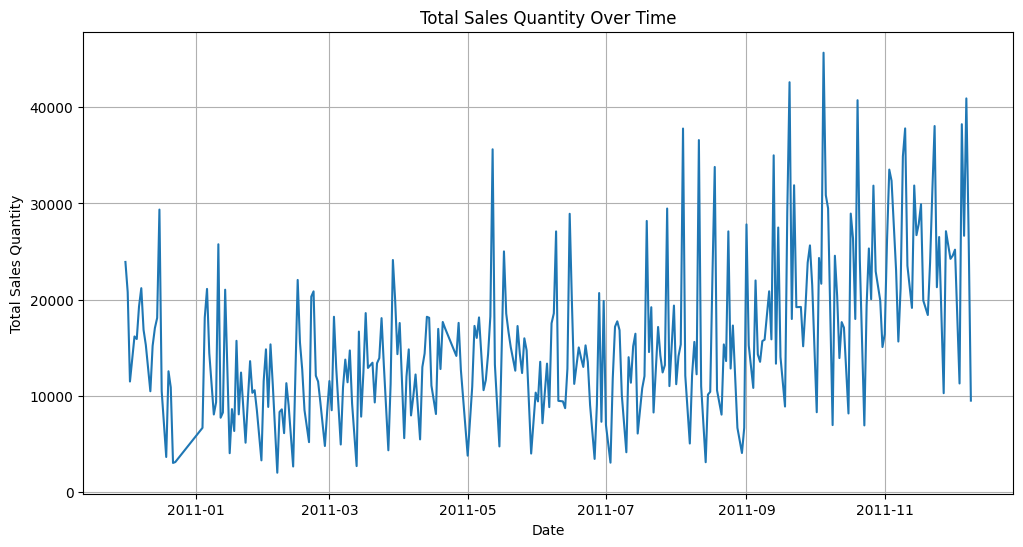

In [ ]:
daily_sales = sales_data.groupby('Date') ['Quantity'].sum()
plt.figure(figsize = (12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.title('Total Sales Quantity Over Time')
plt.grid(True)
plt.show()

Monthly sales

In [ ]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
monthly_sales = sales_data.groupby(sales_data['Date'].dt.to_period("M"))['Price'].sum()
monthly_sales

Date
2010-12     84765.130
2011-01     72465.150
2011-02     66933.050
2011-03     95469.380
2011-04     90649.871
2011-05    124889.970
2011-06    128619.630
2011-07     92280.111
2011-08     87575.810
2011-09    125102.012
2011-10    184702.300
2011-11    192102.250
2011-12     49472.110
Freq: M, Name: Price, dtype: float64

Top selling products

In [ ]:
top_selling_products = sales_data.groupby("Product")['Quantity'].sum().sort_values(ascending=False)
top_selling_products.head(10)

Product
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30488
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64

Top selling products in each country

In [ ]:
top_selling_products_country = sales_data.groupby(["Country","Product"])['Quantity'].sum().reset_index()
top_selling_products_country = top_selling_products_country.sort_values(by =['Country','Quantity'], ascending= [True, False])
top_selling_products_country.groupby('Country').first()

,Product,Quantity
Country,,
Australia,MINI PAINT SET VINTAGE,2916
Austria,SET 12 KIDS COLOUR CHALK STICKS,288
Bahrain,ICE CREAM SUNDAE LIP GLOSS,96
Belgium,PACK OF 72 RETROSPOT CAKE CASES,480
Brazil,DOLLY GIRL LUNCH BOX,24
Canada,RETRO COFFEE MUGS ASSORTED,504
Channel Islands,RAIN PONCHO,407
Cyprus,HEART DECORATION PAINTED ZINC,384
Czech Republic,WOODEN STAR CHRISTMAS SCANDINAVIAN,72


average price of goods

In [ ]:
average_price_by_goods = sales_data.groupby('Product') ['Price'].mean()
average_price_by_goods

Product
 4 PURPLE FLOCK DINNER CANDLES       2.312162
 50'S CHRISTMAS GIFT BAG LARGE       1.248091
 DOLLY GIRL BEAKER                   1.243750
 I LOVE LONDON MINI BACKPACK         4.138406
 I LOVE LONDON MINI RUCKSACK         4.150000
                                      ...    
ZINC T-LIGHT HOLDER STARS SMALL      0.836888
ZINC TOP  2 DOOR WOODEN SHELF       16.768182
ZINC WILLIE WINKIE  CANDLE STICK     0.872344
ZINC WIRE KITCHEN ORGANISER          7.175000
ZINC WIRE SWEETHEART LETTER TRAY     3.454000
Name: Price, Length: 3896, dtype: float64

total sales amount for each country over the past year

In [ ]:
start_date = sales_data['Date'].min()
end_date = sales_data['Date'].max()
each_country_total = sales_data[(sales_data['Date']>= start_date) & (sales_data['Date']<= end_date)]
total_sales_amt_by_country = each_country_total.groupby('Country')['Total_sales'].sum()
total_sales_amt_by_country = total_sales_amt_by_country.sort_values( ascending= False)
total_sales_amt_by_country

Country
United Kingdom          6745578.214
Netherlands              284661.540
EIRE                     250001.780
Germany                  221491.470
France                   196626.050
Australia                137009.770
Switzerland               55739.400
Spain                     54756.030
Belgium                   40910.960
Sweden                    36585.410
Japan                     35340.620
Norway                    35163.460
Portugal                  28995.760
Finland                   22326.740
Channel Islands           20076.390
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12850.360
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6978.400
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2660.770
Malta                      2505.470
United Arab Emirates

monthly sales trend for each country over the year

In [ ]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['month'] = sales_data['Date'].dt.month
monthly_sales_country = sales_data.groupby(['month','Country']) [['Price','Quantity']].sum().reset_index()
monthly_sales_country



,month,Country,Price,Quantity
0,1,Australia,338.94,5644
1,1,Belgium,225.83,783
2,1,Channel Islands,198.73,255
3,1,Cyprus,291.59,124
4,1,EIRE,850.86,8692
...,...,...,...,...
275,12,Spain,401.24,1123
276,12,Sweden,59.17,3714
277,12,Switzerland,146.02,714
278,12,USA,70.21,408


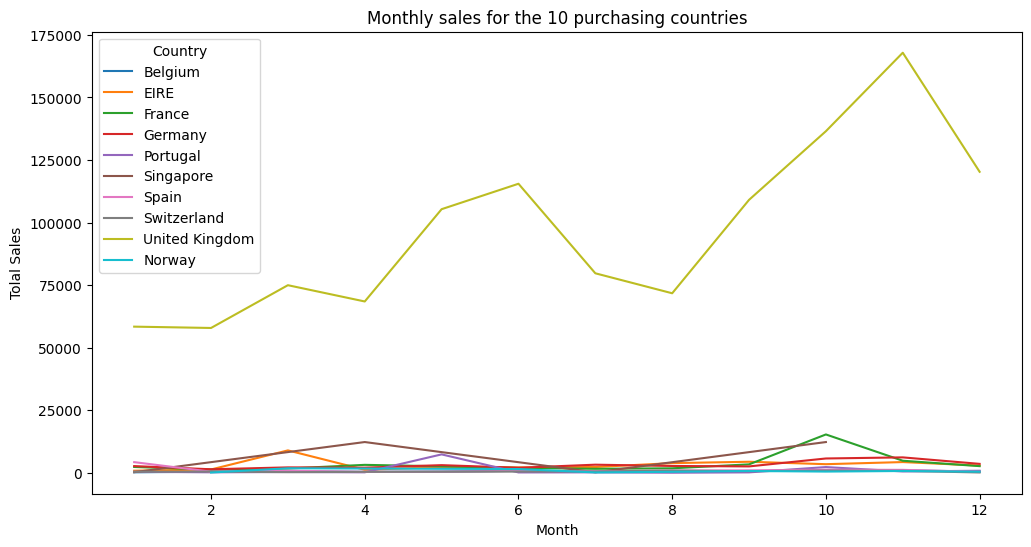

In [ ]:
top_10_countries = monthly_sales_country.groupby('Country') ['Price'].sum().nlargest(10).index
data_filtered = monthly_sales_country[monthly_sales_country['Country'].isin(top_10_countries)]
plt.figure(figsize = (12,6))
sns.lineplot(x ='month',y='Price', hue='Country', data = data_filtered)
plt.title('Monthly sales for the 10 purchasing countries')
plt.xlabel('Month')
plt.ylabel('Tolal Sales')
plt.legend(title='Country')
plt.show()



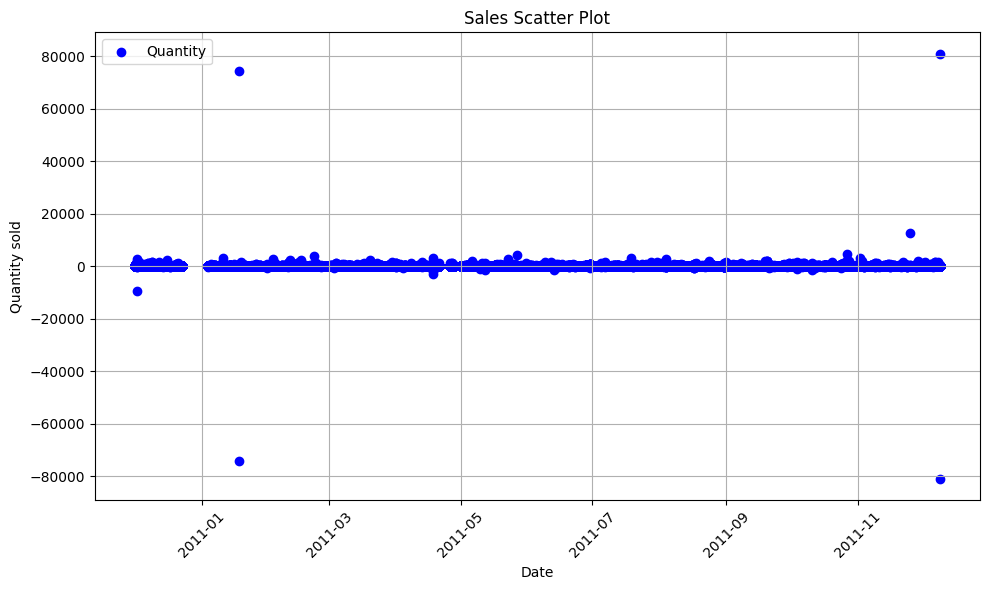

In [ ]:
plt.figure(figsize =(10,6))
plt.scatter(sales_data['Date'], sales_data['Quantity'], color = 'blue', marker = 'o', label ='Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity sold')
plt.title('Sales Scatter Plot')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



to visualise average country sales

sales over time for a specific country

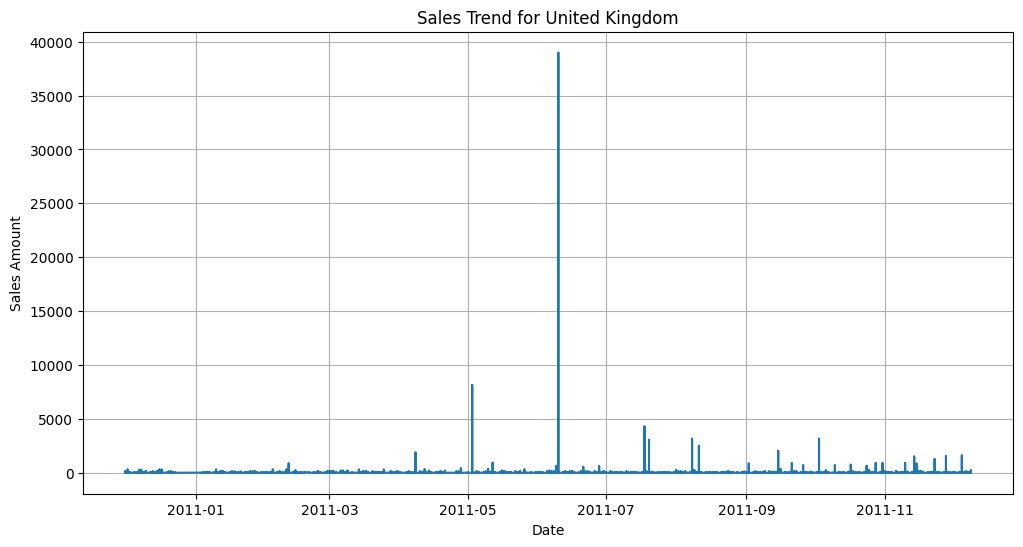

In [ ]:
country = 'United Kingdom'  # Replace with the desired country
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
country_sales = sales_data[sales_data['Country'] == country]

plt.figure(figsize=(12, 6))
plt.plot(country_sales['Date'], country_sales['Price'])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title(f'Sales Trend for {country}')
plt.grid(True)
plt.show()


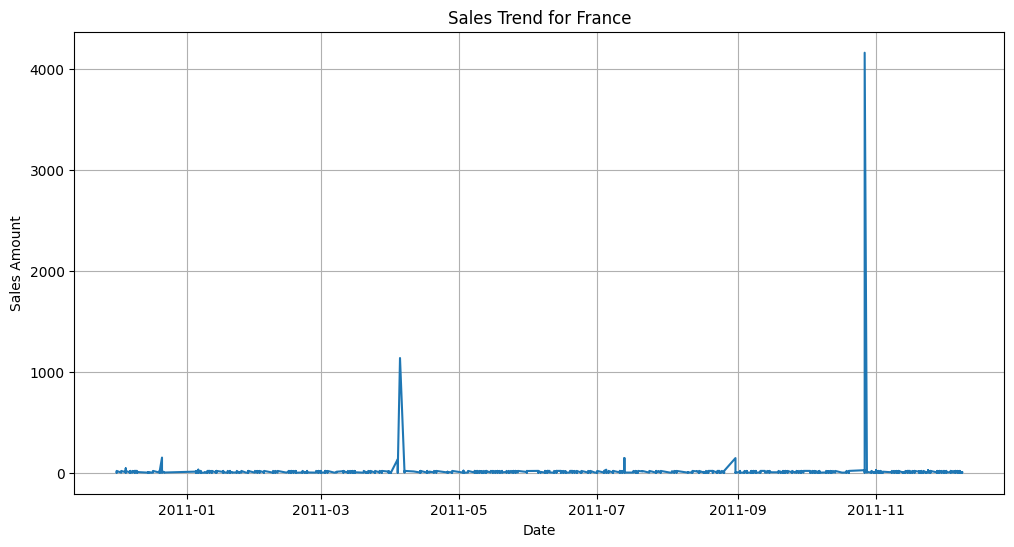

In [ ]:
country = 'France'  # Replace with the desired country
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
country_sales = sales_data[sales_data['Country'] == country]

plt.figure(figsize=(12, 6))
plt.plot(country_sales['Date'], country_sales['Price'])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title(f'Sales Trend for {country}')
plt.grid(True)
plt.show()


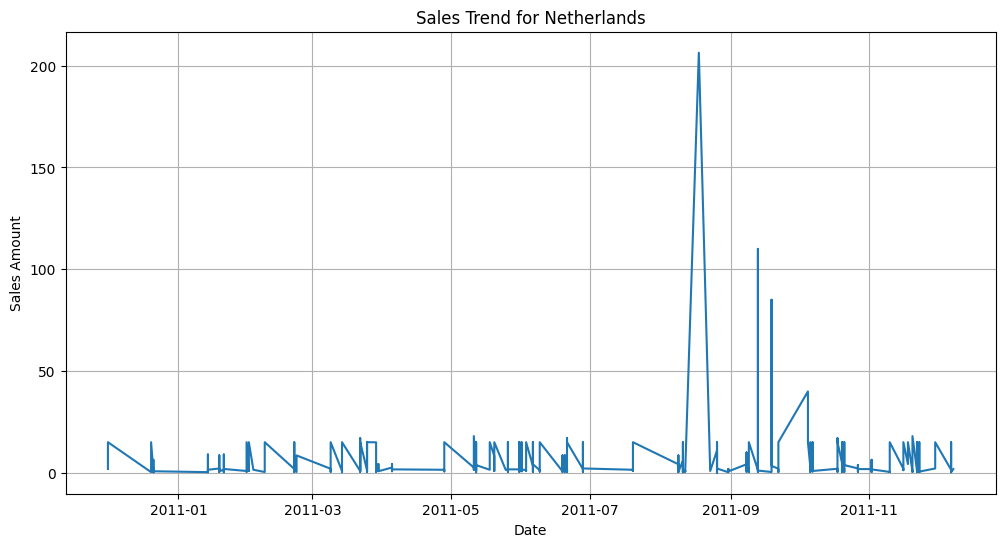

In [ ]:
country = 'Netherlands'  # Replace with the desired country
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
country_sales = sales_data[sales_data['Country'] == country]

plt.figure(figsize=(12, 6))
plt.plot(country_sales['Date'], country_sales['Price'])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title(f'Sales Trend for {country}')
plt.grid(True)
plt.show()


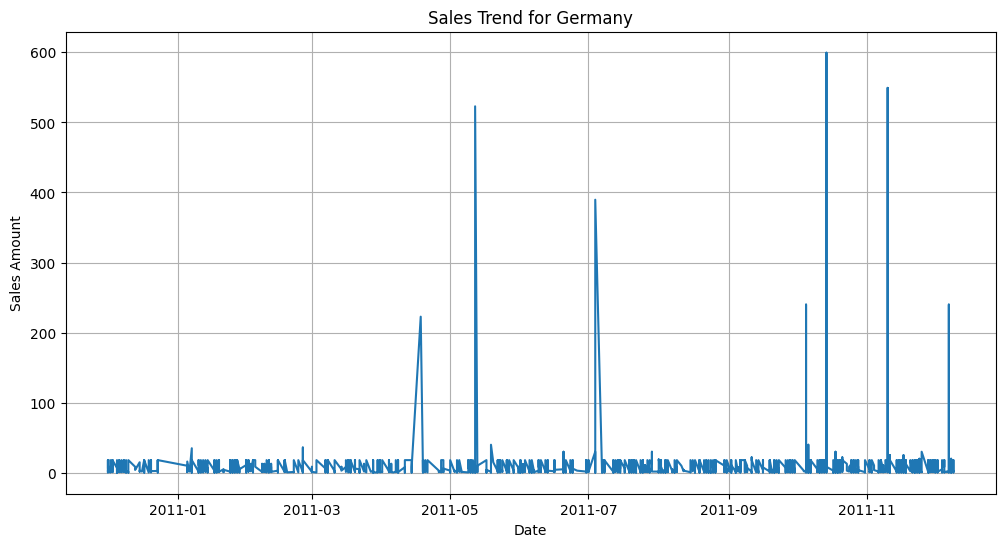

In [ ]:
country = 'Germany'
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
country_sales = sales_data[sales_data['Country'] == country]

plt.figure(figsize=(12, 6))
plt.plot(country_sales['Date'], country_sales['Price'])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title(f'Sales Trend for {country}')
plt.grid(True)
plt.show()

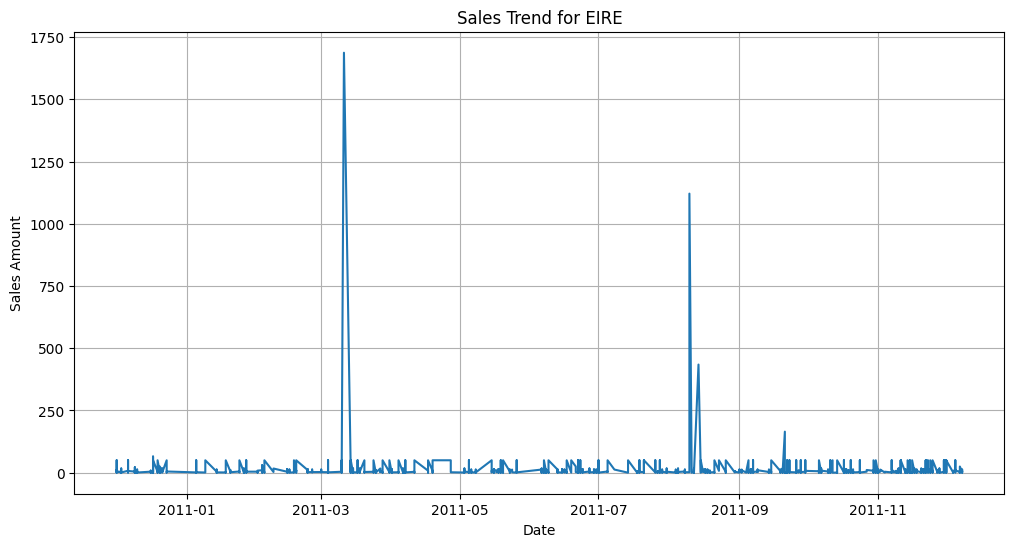

In [ ]:
country = 'EIRE'  # Replace with the desired country
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
country_sales = sales_data[sales_data['Country'] == country]

plt.figure(figsize=(12, 6))
plt.plot(country_sales['Date'], country_sales['Price'])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title(f'Sales Trend for {country}')
plt.grid(True)
plt.show()

 sales distribution across different products within each country over a specific time period?

In [ ]:
# Group by 'Country', 'Goods', and 'Date' to find the total sales quantity
sales_distribution = sales_data.groupby(['Country', 'Product', 'Date'])['Quantity'].sum().reset_index()
sales_distribution


,Country,Product,Date,Quantity
0,Australia,DOLLY GIRL BEAKER,2011-08-18,200
1,Australia,I LOVE LONDON MINI BACKPACK,2011-09-28,4
2,Australia,10 COLOUR SPACEBOY PEN,2011-06-15,48
3,Australia,12 PENCIL SMALL TUBE WOODLAND,2011-02-15,384
4,Australia,12 PENCILS TALL TUBE POSY,2011-03-24,12
...,...,...,...,...
251165,Unspecified,WRAP POPPIES DESIGN,2011-05-10,25
251166,Unspecified,WRAP SUKI AND FRIENDS,2011-05-10,25
251167,Unspecified,WRAP VINTAGE PETALS DESIGN,2011-05-10,25
251168,Unspecified,WRAP WEDDING DAY,2011-07-14,25


sales distribution across different products within each country over a specific time period isnot possible cos the data size is large

start_date = sales_data['Date'].min()
end_date = sales_data['Date'].max()
filtered_data = sales_data[(sales_data['Date']>= start_date) & (sales_data['Date']<= end_date)]
top_countries = filtered_data.groupby('Country') ['Quantity'].sum().nlargest(5).index
filtered_data = filtered_data[filtered_data['Country'].isin(top_countries)]
top_5_countries = filtered_data.groupby(['Country', 'Product'])['Quantity'].sum().unstack()
ax = top_5_countries.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Quantity Sold')
plt.title('Sales Distribution Across Different Products in the Top 5 Countries (2011)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

